In [1]:
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import cv2

import sys
# Get the previous folder and append it to sys.path
PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PATH)

from config import DATAFOLDER

In [2]:
dataset = 'SubF3'

ps = 128 # patch size
step = 1 # step size
stride = ps // 2

In [3]:
DATAPATH = os.path.join(DATAFOLDER, dataset)
DATAPATH2D = os.path.join(DATAPATH, 'Patches2D')
DATAPATH2D

'C:\\Users\\Usuario\\Documents\\Mestrado\\Tesis\\src\\datasets\\SubF3\\Patches2D'

## Read data

In [4]:
m1, m2, m3 = 512,384,128
filename = os.path.join(DATAPATH, 'gxl.dat')

In [5]:
seismic = np.fromfile(filename, dtype=np.single)
seismic = np.reshape(seismic,(m1,m2,m3))
seismic.shape # XL, IL, Z

(512, 384, 128)

### Pre-Processing

In [6]:
# make it XL, Z, IL order
seismic = np.moveaxis(seismic,-2,-1) 
seismic.shape

(512, 128, 384)

In [7]:
# scaling
mean_ = seismic.mean(axis=(1,2), keepdims=True)
std_ = seismic.std(axis=(1,2), keepdims=True)

seismic = (seismic - mean_)/std_

In [8]:
# keep same normalization, but extracting for another side

# make it IL, Z, XL order
seismic = np.transpose(seismic, (2,1,0))
seismic.shape

(384, 128, 512)

## Patch Generation

In [9]:
from dataloaders import PatchGenerator

seismic_slide = seismic[0]
h, w = seismic_slide.shape

patch_generator = PatchGenerator((h,w), ps, stride, phase='train')

nx, left_pad, right_pad, ny, top_pad, bottom_pad
7 0 0 1 0 0


In [10]:
fault_patches_total = []
seismic_patches_total = []
for il in tqdm(range(0, seismic.shape[0], step)):
    seismic_slide = seismic[il]
    seismic_patches = patch_generator.get_patches(seismic_slide)
    seismic_patches_total.append(seismic_patches)
    
seismic_patches_total = np.vstack(seismic_patches_total)
seismic_patches_total.shape #, fault_patches_total.shape

100%|██████████████████████████████████████████████████████████████████████████████| 384/384 [00:00<00:00, 3163.04it/s]


(2688, 128, 128)

### Ploting some of them

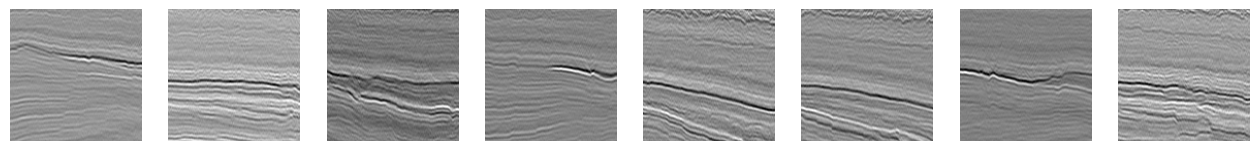

In [11]:
fig, axes = plt.subplots(1, 8, figsize=[16,4])
for i in range(8):
    ix = np.random.choice(len(seismic_patches_total))
    axes[i].imshow(seismic_patches_total[ix], cmap="gray")
    axes[i].axis('off')

### Saving

In [12]:
# dir_imgs = "{}/seismic".format(SAVEPATH)
# len(os.listdir(dir_imgs))

dir_imgs = "{}/seismic".format(DATAPATH2D)
if not os.path.exists(dir_imgs):
    os.makedirs(dir_imgs)

In [13]:
for i in tqdm(range(len(seismic_patches_total))):
#     print(i+2560) # starts where finished the xlines
    np.save("{}/{}.npy".format(dir_imgs, i+2560), seismic_patches_total[i])

100%|████████████████████████████████████████████████████████████████████████████| 2688/2688 [00:01<00:00, 1570.27it/s]


In [14]:
len(os.listdir(dir_imgs))

2688